In [1]:
import selection_sort as selection
import heap_sort as heap
import merge_sort as merge
import quick_sort as quick
import insertion_sort as insert
import random
from timeit import Timer

In [2]:
def crear_listas_con_10k_elementos(N):
    lista = list()
    for i in range(N):
        set1 = list(range(10000))
        random.shuffle(set1)
        lista.append(set1)
    return lista

In [10]:
## item b)
sets_datos = crear_listas_con_10k_elementos(10)
#defino la cantidad de elementos que quiero hacer
cantidad_de_elementos_set = [50, 100, 500]#, 1000, 2000, 3000, 4000, 5000, 7500, 10000]
lista_algoritmos = [heap.heap_sort, selection.selection_sort, merge.merge_sort, quick.quick_sort, insert.insertion_sort]

resultados = {}

In [11]:
conjunto = 0;
for set_actual in sets_datos:
    resultados_por_cantidad_elementos = {}
    for i in cantidad_de_elementos_set:
        lista_resultados_por_algoritmo = list()
        resultados_por_set = {}
        # agarro y a cada algoritmo de la lista lista_algoritmos le tomo el tiempo
        # que tarda en ordenar la lista en set_actual
        for f in lista_algoritmos:
            parametro_lista = set_actual[:i]
            t = Timer(lambda: f(parametro_lista))
            tiempo = t.timeit(1)
            lista_resultados_por_algoritmo.append(tiempo)
        resultados_por_cantidad_elementos[i] = lista_resultados_por_algoritmo
    # guardo todos los resultados de cada conjunto de datos para cada cantidad de elementos para cada algoritmo
    resultados[conjunto] = resultados_por_cantidad_elementos
    conjunto += 1

In [13]:
## item c)
tiempos_medio_algoritmo_rango = {}

for i in resultados.keys():
    print ('Conjunto de datos' + str(i)) 
    for j in resultados[i].keys():
        print ('Cantidad de elementos: ' + str(j))
        print ('heap sort:' + str(resultados[i][j][0]))
        print ('selection sort:' + str(resultados[i][j][1]))
        print ('merge sort:' + str(resultados[i][j][2]))
        print ('quick sort:' + str(resultados[i][j][3]))
        print ('insertion sort:' + str(resultados[i][j][4]))
        if i == 0:
            tiempos_medio_algoritmo_rango[j] = {
                'heapsort': resultados[i][j][0],
                'selectionsort' : resultados[i][j][1],
                'mergesort': resultados[i][j][2],
                'quicksort': resultados[i][j][3],
                'insertion': resultados[i][j][4]
            }
        else:
            tiempos_medio_algoritmo_rango[j] = {
                'heapsort': (tiempos_medio_algoritmo_rango[j]['heapsort'] + resultados[i][j][0])*.5,
                'selectionsort' : (tiempos_medio_algoritmo_rango[j]['selectionsort'] + resultados[i][j][1])*.5,
                'mergesort': (tiempos_medio_algoritmo_rango[j]['mergesort'] + resultados[i][j][2])*.5,
                'quicksort': (tiempos_medio_algoritmo_rango[j]['quicksort'] + resultados[i][j][3])*.5,
                'insertion': (tiempos_medio_algoritmo_rango[j]['insertion'] + resultados[i][j][3])*.5
            }

Conjunto de datos0
Cantidad de elementos: 50
heap sort:0.00051989500207128
selection sort:0.00013950400170870125
merge sort:0.00024645899975439534
quick sort:0.00011680099851218984
insertion sort:0.00029221300064818934
Cantidad de elementos: 100
heap sort:0.000666122003167402
selection sort:0.0004384359999676235
merge sort:0.000695447000907734
quick sort:0.0002409189983154647
insertion sort:0.0009472780002397485
Cantidad de elementos: 500
heap sort:0.00598763699963456
selection sort:0.025497857997834217
merge sort:0.004915804005577229
quick sort:0.0016655129948048852
insertion sort:0.03400296199833974
Conjunto de datos1
Cantidad de elementos: 50
heap sort:0.0003437280029174872
selection sort:0.00013085400132695213
merge sort:0.000294858000415843
quick sort:0.00022270699992077425
insertion sort:0.0005878950032638386
Cantidad de elementos: 100
heap sort:0.0013489479970303364
selection sort:0.0010867249948205426
merge sort:0.0015453450032509863
quick sort:0.0008007950018509291
insertion s

In [14]:
## item d)
for t in tiempos_medio_algoritmo_rango.keys():
    print ('tiempo medio con ' + str(t) + ' iteraciones: ')
    print ('\t heapsort: ' + str(tiempos_medio_algoritmo_rango[t]['heapsort']))
    print ('\t selectionsort: ' + str(tiempos_medio_algoritmo_rango[t]['selectionsort']))
    print ('\t mergesort: ' + str(tiempos_medio_algoritmo_rango[t]['mergesort']))
    print ('\t quicksort: ' + str(tiempos_medio_algoritmo_rango[t]['quicksort']))
    print ('\t insertion sort: ' + str(tiempos_medio_algoritmo_rango[t]['insertion']))

tiempo medio con 50 iteraciones: 
	 heapsort: 0.0006894692062076047
	 selectionsort: 0.0005126841030147489
	 mergesort: 0.0003096043138270943
	 quicksort: 0.0001868365473853828
	 insertion sort: 0.00018717914895205467
tiempo medio con 100 iteraciones: 
	 heapsort: 0.0018270529861865725
	 selectionsort: 0.0015586278473875836
	 mergesort: 0.0019433854486976543
	 quicksort: 0.00036819716231661914
	 insertion sort: 0.0003695767697422525
tiempo medio con 500 iteraciones: 
	 heapsort: 0.011325740082583025
	 selectionsort: 0.026121969289349067
	 mergesort: 0.003869278725545655
	 quicksort: 0.0018346979371841599
	 insertion sort: 0.0018978570172691889


t 50
t 100
t 500
heapsort
[50, 100, 500]
[0.0006894692062076047, 0.0018270529861865725, 0.011325740082583025]


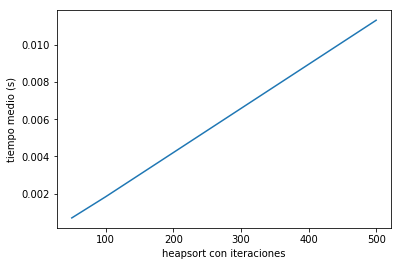

selectionsort
[50, 100, 500]
[0.0005126841030147489, 0.0015586278473875836, 0.026121969289349067]


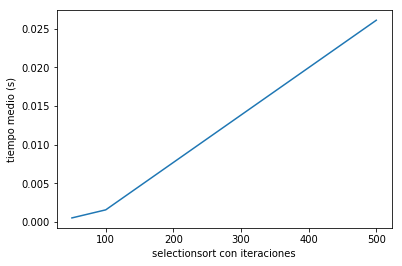

mergesort
[50, 100, 500]
[0.0003096043138270943, 0.0019433854486976543, 0.003869278725545655]


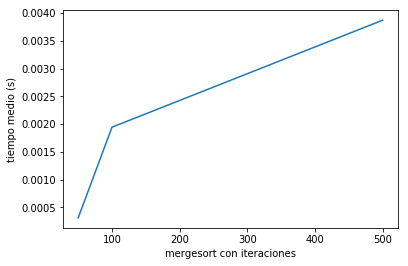

quicksort
[50, 100, 500]
[0.0001868365473853828, 0.00036819716231661914, 0.0018346979371841599]


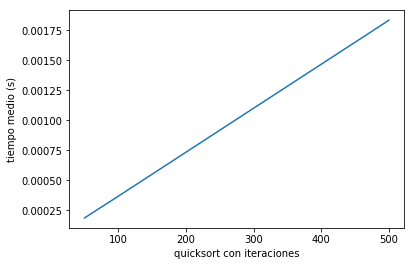

insertion
[50, 100, 500]
[0.00018717914895205467, 0.0003695767697422525, 0.0018978570172691889]


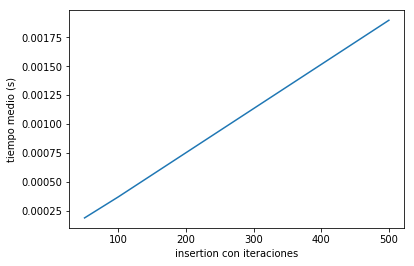

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

#grafico los tiempos medios para cada algoritmo
algoritmos_x = {}
algoritmos_y = {}
for t in tiempos_medio_algoritmo_rango.keys():
    print ('t ' + str(t))
    for alg in tiempos_medio_algoritmo_rango[t].keys():
        algoritmos_x[alg] = list()    
        algoritmos_y[alg] = list()
        
for t in tiempos_medio_algoritmo_rango.keys():
    for alg in tiempos_medio_algoritmo_rango[t].keys():
        algoritmos_x[alg].append(t)
        algoritmos_y[alg].append(tiempos_medio_algoritmo_rango[t][alg])
    #print ('tiempo medio con ' + str(t) + ' iteraciones: ')
    #print ('\t heapsort: ' + str(tiempos_medio_algoritmo_rango[t]['heapsort']))
    #print ('\t selectionsort: ' + str(tiempos_medio_algoritmo_rango[t]['selectionsort']))
    #print ('\t mergesort: ' + str(tiempos_medio_algoritmo_rango[t]['mergesort']))
    #print ('\t quicksort: ' + str(tiempos_medio_algoritmo_rango[t]['quicksort']))
for alg in algoritmos_x.keys():
    print(alg)
    print(algoritmos_x[alg])
    print(algoritmos_y[alg])
    plt.plot(algoritmos_x[alg], algoritmos_y[alg])
    plt.xlabel(alg + ' con iteraciones')   
    plt.ylabel('tiempo medio (s)')
    plt.show()
        
        
    #algoritmo1_y.append(tiempos_medio_algoritmo_rango[t]['heapsort'])
    #print ([t,tiempos_medio_algoritmo_rango[t]['heapsort']])
# tendria que agarrar un algoritmo y graficar todos sus tiempos

#plt.plot(algoritmo1_x, algoritmo1_y)
#plt.xlabel('iteraciones')
#plt.ylabel('tiempo medio')
#plt.show()